In [10]:
import numpy as np
from tensorflow.keras import *
import scipy 
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image

In [11]:
# from tensorflow.python.client import device_lib
import tensorflow as tf
tf.config.list_physical_devices("GPU")
# device_lib.list_local_devices()

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [12]:
TRAIN_DIR = 'D:/major project/archive (1)/train'
N_CLASS = 3

In [13]:
data_generator = preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [14]:
I_ROW = 100
I_COL = 100

In [15]:
def get_data(data_generator, file_path, bs=32):
    data_generator = preprocessing.image.ImageDataGenerator(rescale=1./255,
                                   validation_split=0.2)  
    
    train_data = data_generator.flow_from_directory(file_path, 
                                               target_size=(I_ROW, I_COL), 
                                               batch_size=bs, 
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset = 'training') 

    val_data = data_generator.flow_from_directory(file_path, 
                                           target_size=(I_ROW, I_COL), 
                                           batch_size=bs, 
                                           class_mode='categorical',
                                           shuffle=True,
                                           subset = 'validation')
    
#     data = data_generator.flow_from_directory(
#         file_path,
#         target_size = (I_ROW, I_COL),
#         color_mode = "grayscale",
#         batch_size = 32
#     )
    return train_data, val_data

In [16]:
train_data, test_data = get_data(data_generator, TRAIN_DIR)

Found 7367 images belonging to 3 classes.
Found 1841 images belonging to 3 classes.


In [17]:
images, labels = train_data.next()

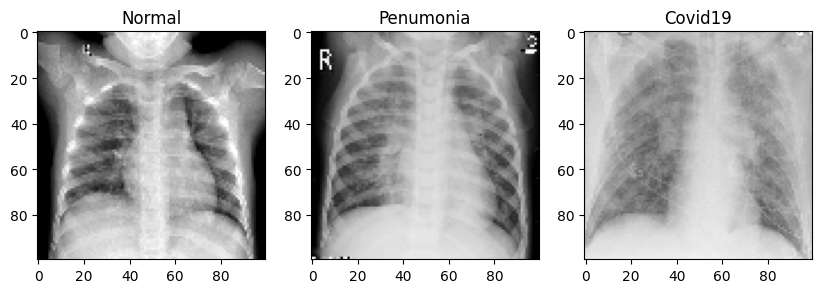

In [18]:
fig, ax = plot_container = plt.subplots(1, 3)
fig.set_size_inches(10, 4)

label_dict = {0:'Covid19', 1:'Normal', 2:'Penumonia'}

cursor = 0
seen = list()

for image, label in zip(images, labels):
    class_label = backend.argmax(label).numpy()
    if class_label not in seen:
        ax[cursor].imshow(image.reshape(I_ROW, I_COL, 3), cmap='gray')
        ax[cursor].set_title(label_dict[class_label])
        seen.append(class_label)
        cursor += 1

In [19]:
def get_feedforward():
    activation = activations.relu;
    inp = layers.Input(shape = (I_ROW, I_COL, 3))
    out = layers.Flatten()(inp)
    out = layers.Dense(4800, activation=activation)(out)
    out = layers.Dense(3200, activation=activation)(out)
    out = layers.Dense(1600, activation=activation)(out)
    out = layers.Dense(N_CLASS, activation=activations.softmax)(out)
    
    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    
    return model    

In [29]:
fwd_model = get_feedforward()
# fwd_model.load_weights('./checkpoints/fwd')

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[30000,4800] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]

In [23]:
history = fwd_model.fit(train_data, validation_data=test_data, epochs=20)
fwd_model.save_weights('./checkpoints/fwd')

Epoch 1/20
231/231 [==============================] - 276s 1s/step - loss: 3.1051 - accuracy: 0.7969 - val_loss: 0.2087 - val_accuracy: 0.9310
Epoch 2/20
231/231 [==============================] - 222s 962ms/step - loss: 0.2793 - accuracy: 0.8962 - val_loss: 0.2341 - val_accuracy: 0.9234
Epoch 3/20
231/231 [==============================] - 193s 834ms/step - loss: 0.2699 - accuracy: 0.9009 - val_loss: 0.3117 - val_accuracy: 0.9006
Epoch 4/20
231/231 [==============================] - 191s 827ms/step - loss: 0.2466 - accuracy: 0.9077 - val_loss: 0.1719 - val_accuracy: 0.9272
Epoch 5/20
231/231 [==============================] - 191s 828ms/step - loss: 0.2355 - accuracy: 0.9129 - val_loss: 0.1771 - val_accuracy: 0.9381
Epoch 6/20
231/231 [==============================] - 189s 821ms/step - loss: 0.2414 - accuracy: 0.9084 - val_loss: 0.2497 - val_accuracy: 0.9120
Epoch 7/20
231/231 [==============================] - 187s 811ms/step - loss: 0.2288 - accuracy: 0.9186 - val_loss: 0.1479 - va

In [24]:
def get_cnn():
    activation = activations.relu;
    inp = layers.Input(shape = (I_ROW, I_COL, 3))
    out = layers.Conv2D(32, (3, 3), activation='relu')(inp)
    out = layers.MaxPooling2D((2, 2))(out)
    out = layers.Conv2D(64, (3, 3), activation='relu')(inp)
    out = layers.MaxPooling2D((2, 2))(out)
    out = layers.Flatten()(out)
    out = layers.Dense(64, activation=activation)(out)
    out = layers.Dense(10, activation=activation)(out)
    out = layers.Dense(N_CLASS, activation=activations.softmax)(out)
    
    model = models.Model(inputs=inp, outputs=out)
    model.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    
    return model       

In [28]:
cnn_model = get_cnn();
cnn_model.load_weights('./checkpoints2/cnn')

In [26]:
history = cnn_model.fit(train_data, validation_data=test_data, epochs=20)
cnn_model.save_weights('./checkpoints2/cnn')

Epoch 1/20
231/231 [==============================] - 191s 625ms/step - loss: 0.7952 - accuracy: 0.6045 - val_loss: 0.4444 - val_accuracy: 0.7061
Epoch 2/20
231/231 [==============================] - 130s 564ms/step - loss: 0.2656 - accuracy: 0.9108 - val_loss: 0.1543 - val_accuracy: 0.9484
Epoch 3/20
231/231 [==============================] - 150s 641ms/step - loss: 0.1517 - accuracy: 0.9465 - val_loss: 0.1437 - val_accuracy: 0.9614
Epoch 4/20
231/231 [==============================] - 141s 611ms/step - loss: 0.1137 - accuracy: 0.9614 - val_loss: 0.1129 - val_accuracy: 0.9685
Epoch 5/20
231/231 [==============================] - 147s 636ms/step - loss: 0.0836 - accuracy: 0.9710 - val_loss: 0.1043 - val_accuracy: 0.9701
Epoch 6/20
231/231 [==============================] - 151s 655ms/step - loss: 0.0628 - accuracy: 0.9798 - val_loss: 0.1181 - val_accuracy: 0.9690
Epoch 7/20
231/231 [==============================] - 142s 615ms/step - loss: 0.0457 - accuracy: 0.9870 - val_loss: 0.1066 -

In [10]:
def get_res_net():
    activation = activations.relu;
    
    
    base_model = applications.ResNet50(weights='imagenet', include_top=False, pooling='avg', input_shape=(I_ROW, I_COL, 3))  
    for layer in base_model.layers:
          layer.trainable = False
            
    out = layers.Flatten()(base_model.output)
#     out = layers.BatchNormalization()(out)
#     out = layers.Dense(2048, activation=activation)(out)
#     out = layers.BatchNormalization()(out)
#     out = layers.Dense(1024, activation=activation)(out)
# #     out = layers.BatchNormalization()(out)
#     out = layers.Dense(64, activation=activation)(out)
# #     out = layers.BatchNormalization()(out)
    out = layers.Dense(64, activation=activation)(out)
    out = layers.Dense(32, activation=activation)(out)
    out = layers.Dense(N_CLASS, activation=activations.sigmoid)(out)
        
    model = Model(inputs=base_model.input, outputs=out)

    model.compile(optimizer=optimizers.Adam(), loss=losses.categorical_crossentropy, metrics=['accuracy'])
    
    return model 

In [11]:
res_net = get_res_net()
# res_net.load_weights('./checkpoints3/res')

In [12]:
history = res_net.fit(train_data, validation_data=test_data, epochs=20)
res_net.save_weights('./checkpoints3/res')

Epoch 1/20
231/231 [==============================] - 479s 2s/step - loss: 0.8172 - accuracy: 0.6399 - val_loss: 0.6689 - val_accuracy: 0.7170
Epoch 2/20
231/231 [==============================] - 383s 2s/step - loss: 0.5440 - accuracy: 0.7892 - val_loss: 0.4965 - val_accuracy: 0.7920
Epoch 3/20
231/231 [==============================] - 338s 1s/step - loss: 0.4432 - accuracy: 0.8279 - val_loss: 0.4553 - val_accuracy: 0.8289
Epoch 4/20
231/231 [==============================] - 345s 1s/step - loss: 0.3872 - accuracy: 0.8489 - val_loss: 0.4349 - val_accuracy: 0.8229
Epoch 5/20
231/231 [==============================] - 452s 2s/step - loss: 0.3741 - accuracy: 0.8595 - val_loss: 0.3918 - val_accuracy: 0.8387
Epoch 6/20
231/231 [==============================] - 332s 1s/step - loss: 0.3424 - accuracy: 0.8697 - val_loss: 0.3313 - val_accuracy: 0.8783
Epoch 7/20
231/231 [==============================] - 320s 1s/step - loss: 0.3433 - accuracy: 0.8705 - val_loss: 0.5619 - val_accuracy: 0.7637

In [25]:
res_net.save_weights('./checkpoints3/res')